###***HT2***

####*Task1*

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/Untitled spreadsheet - Sheet1.csv")
df

,X
0,9.4
1,8.7
2,1.1
3,10.0
4,8.3
...,...
95,4.6
96,2.4
97,6.1
98,9.2


In [ ]:
df = df.sort_values(by="X")
array = np.array(df["X"])
array

array([ 0.2,  0.3,  0.4,  0.5,  0.7,  0.8,  1. ,  1.1,  1.2,  1.4,  1.7,
        1.8,  1.9,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.9,  3.1,  3.2,
        3.3,  3.4,  3.6,  3.7,  3.8,  4.2,  4.3,  4.4,  4.4,  4.5,  4.6,
        4.7,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.5,  5.6,  5.7,
        5.7,  5.8,  5.9,  5.9,  6. ,  6.1,  6.2,  6.2,  6.3,  6.4,  6.5,
        6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8.1,  8.2,  8.3,  8.4,  8.6,  8.7,  8.8,  8.9,  9. ,
        9.1,  9.2,  9.4,  9.5,  9.6,  9.7,  9.9, 10. , 10.1, 10.2, 10.3,
       10.5, 10.9, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9,
       11.9])

In [ ]:
range_of_variation = max(array) - min(array)
range_of_variation

11.700000000000001

In [ ]:
import math
h_interval = (range_of_variation)/(9)
h_interval

1.3

In [ ]:
interval_df = pd.DataFrame(columns=["Left bound", "Right bound", "Middle of the interval", "Frequency of the interval", "Relative frequency", "Relative frequency density"])
# at first, we need to form the array with bounds: 
X = [] 
left = array[0]
right = array[-1]

while left < right + h_interval:
  X.append(left)
  left += h_interval


for i in range(1, len(X)):
  #We need to find left and right bounds and the middle of the interval
  left_bound = X[i-1]
  right_bound = X[i]
  middle = (right_bound + left_bound)/2
  #Here we're going to find frequency, relative frequency and relative vreauency density
  interval_array_size = len(df.query("X >= " + str(left_bound) + " & X<= "+str(right_bound)))
  rel_frequency = interval_array_size/len(array)
  rel_frequency_density = rel_frequency/h_interval

  #Forming the new line of data frame
  new_line = [left_bound, right_bound, middle, interval_array_size, rel_frequency, rel_frequency_density]
  interval_df.loc[len(interval_df)] = new_line

middles = interval_df["Middle of the interval"]
frequencies = interval_df["Frequency of the interval"]
relative_frequencies = interval_df["Relative frequency"]
interval_df

,Left bound,Right bound,Middle of the interval,Frequency of the interval,Relative frequency,Relative frequency density
0,0.2,1.5,0.85,10.0,0.10,0.076923
1,1.5,2.8,2.15,9.0,0.09,0.069231
2,2.8,4.1,3.45,8.0,0.08,0.061538
3,4.1,5.4,4.75,14.0,0.14,0.107692
4,5.4,6.7,6.05,14.0,0.14,0.107692
5,6.7,8.0,7.35,13.0,0.13,0.100000
6,8.0,9.3,8.65,11.0,0.11,0.084615
7,9.3,10.6,9.95,10.0,0.10,0.076923
8,10.6,11.9,11.25,11.0,0.11,0.084615


Lets draw the polygon

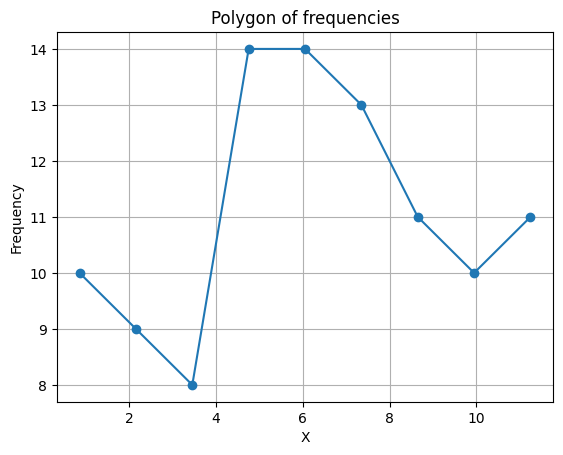

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("X")
plt.ylabel("Frequency")
plt.title("Polygon of frequencies")
plt.grid(True)
plt.plot(middles, frequencies, marker="o")


Now we need to draw histogram of relative frequencies

(array([0.1 , 0.09, 0.08, 0.14, 0.14, 0.13, 0.11, 0.1 , 0.11]),
 array([ 0.2,  1.5,  2.8,  4.1,  5.4,  6.7,  8. ,  9.3, 10.6, 11.9]),
 <BarContainer object of 9 artists>)

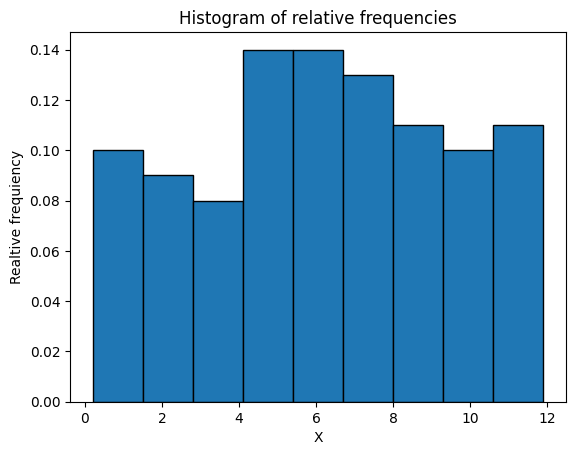

In [ ]:
import numpy as np
plt.title("Histogram of relative frequencies")
plt.xlabel("X")
plt.ylabel("Realtive frequiency")
plt.hist(array, edgecolor="black", weights=np.ones_like(array)/len(array), bins=X)

Now we should generate empirical distribution function

In [ ]:
array = list(array)
X = list(X)
relative_frequencies = list(relative_frequencies)
def F(x):
  prob = 0
  i = 0
  if (x > X[-1]):
    return 1 
  if (x < X[0]):
    return 0
  while x > X[i]:
    prob += relative_frequencies[i]
    i+=1
  return prob

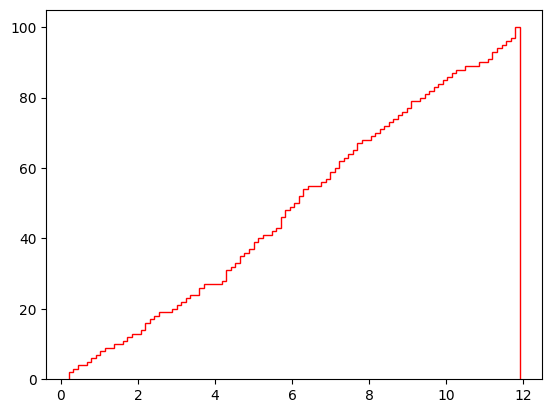

In [ ]:
a = plt.hist(array, histtype='step', cumulative=True, bins=len(array), color="Red")

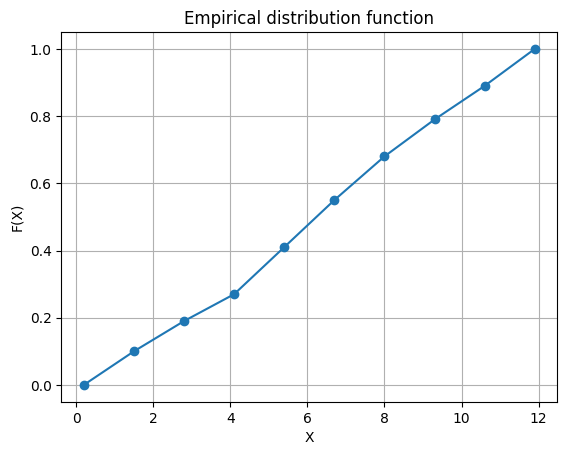

In [ ]:
XI = [ii for ii in X]
YI = [F(ii) for ii in XI]
plt.xlabel("X")
plt.ylabel("F(X)")
plt.title("Empirical distribution function")
plt.grid(True)

plt.plot(XI, YI, marker="o")


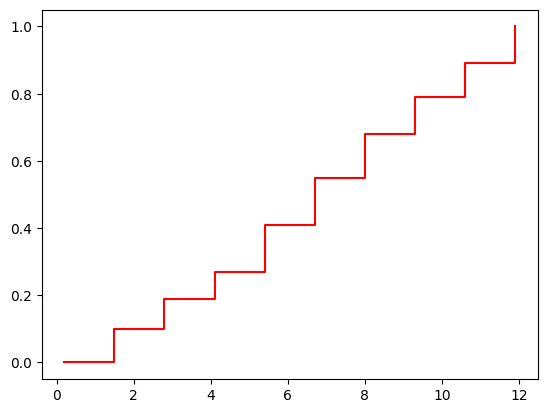

In [ ]:
a = plt.step(XI, YI,color="Red", where="post")


We can't use lib math functions, so lets create them...

In [ ]:
def mean(X):
  summary = 0 
  for i in range(1, len(X)):
    summary += (X[i] + X[i-1])/2 * frequencies[i-1]
  return summary/len(array)


def variance(X):
  x_mean = mean(X)
  answer = 0 
  for i in range(1, len(X)):
    answer += (((X[i]+X[i-1])/2)**2 * frequencies[i-1])
  return answer/len(array) - x_mean**2

def standard_deviation(X):
  return variance(X)**0.5

def fixed_variance(X):
  return len(array)/(len(array)-1) * variance(X)

def fixed_standard_deviation(X):
  return fixed_variance(X)**0.5

Searching for mean(X)

In [ ]:
x_mean = mean(X)
x_mean

6.2059999999999995

Searching for variance

In [ ]:
x_var = variance(X)
x_var

10.284663999999992

Searching for mean standard deviation

In [ ]:
x_std = standard_deviation(X)
x_std

3.2069711567146957

Searching for fixed variance

In [ ]:
x_var_fixed = fixed_variance(X)
x_var_fixed

10.388549494949487

Searching for fixed standard deviation

In [ ]:
x_std_fixed = fixed_standard_deviation(X)
x_std_fixed

3.2231272849438457

In [ ]:
freq_df = pd.DataFrame(columns=["Left bound", "Right bound", "Middle of the interval, x'_i", "Frequency of the interval, n_i", "n_i * x'_i", "(x'_i)^2", "n_i * (x'_i)^2"])

for i in range(1, len(X)):
  left_bound = X[i-1]
  right_bound = X[i]
  middle = (left_bound + right_bound)/2
  freq = frequencies[i-1]
  ni_xi = middle * freq
  xi_xi = middle**2
  ni_xi_xi = ni_xi * middle

  new_line = [left_bound, right_bound, middle, freq, ni_xi, xi_xi, ni_xi_xi]
  freq_df.loc[len(freq_df)] = new_line
freq_df

,Left bound,Right bound,"Middle of the interval, x'_i","Frequency of the interval, n_i",n_i * x'_i,(x'_i)^2,n_i * (x'_i)^2
0,0.2,1.5,0.85,10.0,8.50,0.7225,7.2250
1,1.5,2.8,2.15,9.0,19.35,4.6225,41.6025
2,2.8,4.1,3.45,8.0,27.60,11.9025,95.2200
3,4.1,5.4,4.75,14.0,66.50,22.5625,315.8750
4,5.4,6.7,6.05,14.0,84.70,36.6025,512.4350
5,6.7,8.0,7.35,13.0,95.55,54.0225,702.2925
6,8.0,9.3,8.65,11.0,95.15,74.8225,823.0475
7,9.3,10.6,9.95,10.0,99.50,99.0025,990.0250
8,10.6,11.9,11.25,11.0,123.75,126.5625,1392.1875


In [ ]:
summary_df = pd.DataFrame(columns=["Sum frequencies", "Sum n_i * x'_i", "Sum n_i * (x'_i)^2"])
liner = [sum(freq_df["Frequency of the interval, n_i"]), sum(freq_df["n_i * x'_i"]), sum(freq_df["n_i * (x'_i)^2"])]
summary_df.loc[len(summary_df)] = liner 
summary_df

,Sum frequencies,Sum n_i * x'_i,Sum n_i * (x'_i)^2
0,100.0,620.6,4879.91


we need to find theoretical frequencies for pearson's criteria 

At first, we need to correct data frame:

In [ ]:
X = []
frequencies = []
for i in range(len(freq_df)-1):
  if(freq_df["Frequency of the interval, n_i"][i] < 5):
    freq_df["Left bound"][i+1] = freq_df["Left bound"][i]
    freq_df["Frequency of the interval, n_i"][i+1] += freq_df["Frequency of the interval, n_i"][i]
  else:
    X.append(freq_df["Left bound"][i])
    frequencies.append(freq_df["Frequency of the interval, n_i"][i])
if(freq_df["Frequency of the interval, n_i"][len(freq_df)-1] < 5):
  frequencies.pop()
  freq_df["Frequency of the interval, n_i"][len(freq_df)-2] += freq_df["Frequency of the interval, n_i"][len(freq_df)-1]
  freq_df["Right bound"][len(freq_df)-2] += freq_df["Right bound"][len(freq_df)-1]
  X.append(freq_df["Right bound"][len(freq_df)-1])
  frequencies.append(freq_df["Frequency of the interval, n_i"][len(freq_df)-2])
else:
  X.append(freq_df["Left bound"][len(freq_df)-1])
  X.append(freq_df["Right bound"][len(freq_df)-1])
  frequencies.append(freq_df["Frequency of the interval, n_i"][len(freq_df)-1])

In [ ]:
xz_df = pd.DataFrame(columns=["x_i", "x_{i+1}", "ni", "x_i - x_mean", "x_{i+1} + x_mean", "z_i = (x_i - x_mean)/sigma", "z_{i+1} = (x_{i+1} - x_mean)/sigma"])
for i in range(1, len(X)):
  left_bound = X[i-1]
  right_bound = X[i]
  ni = frequencies[i-1]
  delta1 = X[i-1] - x_mean
  delta2 = X[i] - x_mean
  zi = delta1/x_std
  zipp = delta2/x_std
  new_line = [left_bound, right_bound, ni, delta1, delta2, zi, zipp]
  xz_df.loc[len(xz_df)] = new_line
xz_df

,x_i,x_{i+1},ni,x_i - x_mean,x_{i+1} + x_mean,z_i = (x_i - x_mean)/sigma,z_{i+1} = (x_{i+1} - x_mean)/sigma
0,0.2,1.5,10.0,-6.006,-4.706,-1.872795,-1.467428
1,1.5,2.8,9.0,-4.706,-3.406,-1.467428,-1.062061
2,2.8,4.1,8.0,-3.406,-2.106,-1.062061,-0.656694
3,4.1,5.4,14.0,-2.106,-0.806,-0.656694,-0.251327
4,5.4,6.7,14.0,-0.806,0.494,-0.251327,0.154039
5,6.7,8.0,13.0,0.494,1.794,0.154039,0.559406
6,8.0,9.3,11.0,1.794,3.094,0.559406,0.964773
7,9.3,10.6,10.0,3.094,4.394,0.964773,1.370140
8,10.6,11.9,11.0,4.394,5.694,1.370140,1.775507


In [ ]:
import math
from scipy.integrate import quad
def under_integral(z):
  return math.e**(-z*z/2)

def Ф(x):
  return 1/(math.sqrt(2*math.pi)) * quad(under_integral, 0, x)[0]
  

In [ ]:
Z = list(xz_df["z_i = (x_i - x_mean)/sigma"])
Z.append(xz_df["z_{i+1} = (x_{i+1} - x_mean)/sigma"][len(xz_df)-1])
print(*Z)
z_df = pd.DataFrame(columns=["z_i", "z_{i+1}", "Ф(zi)", "Ф(z_{i+1})", "P_i = Ф(z_{i+1}) - Ф(z_i)", "n'_i = 100P_i"])
for i in range(1, len(Z)):
  left_z = Z[i-1]
  right_z = Z[i]  
  if(left_z < 0):
    f_xi = -Ф(-left_z)
  else:
    f_xi = Ф(left_z)
  if(right_z < 0):
    f_xipp = -Ф(-right_z)
  else:  
    f_xipp = Ф(right_z)
  
  if (i==1):
    f_xi = -0.5
  if (i==len(Z)-1):
    f_xipp = 0.5
  pi = f_xipp - f_xi
  ni = 100 * pi
  new_line = [left_z, right_z, f_xi, f_xipp, pi, ni]
  z_df.loc[len(z_df)] = new_line
z_df

-1.8727951411177335 -1.4674282274558863 -1.0620613137940393 -0.6566944001321923 -0.2513274864703452 0.15403942719150182 0.5594063408533488 0.9647732545151959 1.3701401681770433 1.7755070818388905


,z_i,z_{i+1},Ф(zi),Ф(z_{i+1}),P_i = Ф(z_{i+1}) - Ф(z_i),n'_i = 100P_i
0,-1.872795,-1.467428,-0.500000,-0.428870,0.071130,7.112980
1,-1.467428,-1.062061,-0.428870,-0.355896,0.072974,7.297413
2,-1.062061,-0.656694,-0.355896,-0.244311,0.111585,11.158479
3,-0.656694,-0.251327,-0.244311,-0.099220,0.145092,14.509175
4,-0.251327,0.154039,-0.099220,0.061211,0.160430,16.043021
5,0.154039,0.559406,0.061211,0.212058,0.150847,15.084711
6,0.559406,0.964773,0.212058,0.332671,0.120613,12.061302
7,0.964773,1.370140,0.332671,0.414678,0.082008,8.200762
8,1.370140,1.775507,0.414678,0.500000,0.085322,8.532158


In [ ]:
sum_pi = sum(z_df["P_i = Ф(z_{i+1}) - Ф(z_i)"])
sum_pi

1.0

In [ ]:
summary = sum(z_df["n'_i = 100P_i"])
summary

100.0

Let us calculate the observed value of the Pearson criterion

In [ ]:
pearson_df = pd.DataFrame(columns=["ni", "n'i", "ni - n'i", "(ni - n'i)^2", "(ni - n'i)^2/(n'i)", "ni^2", "ni^2 / n'i"])
n_dot_array = list(z_df["n'_i = 100P_i"])
for i in range(len(frequencies)):
  ni = frequencies[i]
  n_dot_i = n_dot_array[i]
  delta = ni - n_dot_i
  delta2 = delta**2
  delta_divide = delta2/n_dot_i
  ni2 = ni**2
  divide = ni**2/n_dot_i
  new_line = [ni, n_dot_i, delta, delta2, delta_divide, ni2, divide]
  pearson_df.loc[len(pearson_df)] = new_line 
pearson_df


,ni,n'i,ni - n'i,(ni - n'i)^2,(ni - n'i)^2/(n'i),ni^2,ni^2 / n'i
0,10.0,7.112980,2.887020,8.334884,1.171785,100.0,14.058805
1,9.0,7.297413,1.702587,2.898804,0.397237,81.0,11.099825
2,8.0,11.158479,-3.158479,9.975991,0.894028,64.0,5.735549
3,14.0,14.509175,-0.509175,0.259259,0.017869,196.0,13.508694
4,14.0,16.043021,-2.043021,4.173936,0.260171,196.0,12.217150
5,13.0,15.084711,-2.084711,4.346019,0.288108,169.0,11.203397
6,11.0,12.061302,-1.061302,1.126362,0.093386,121.0,10.032084
7,10.0,8.200762,1.799238,3.237257,0.394751,100.0,12.193989
8,11.0,8.532158,2.467842,6.090246,0.713799,121.0,14.181642


In [ ]:
summary_table = pd.DataFrame(columns=["Sum ni", "Sum n'i", "X2 = Sum (ni - n'i)^2/(n'i)", "Sum ni^2 / n'i"])
liner = [sum(pearson_df["ni"]), sum(pearson_df["n'i"]), sum(pearson_df["(ni - n'i)^2/(n'i)"]), sum(pearson_df["ni^2 / n'i"])]
summary_table.loc[len(summary_table)] = liner 
summary_table

,Sum ni,Sum n'i,X2 = Sum (ni - n'i)^2/(n'i),Sum ni^2 / n'i
0,100.0,100.0,4.231134,104.231134


Control

In [ ]:
summary_table["Sum ni^2 / n'i"][0] - len(array)

4.231134039994018

Now we need to use table for X2cr.

k = l - 3 = 7 - 3 = 4 

alpha = 0.01 

X2 cr = 13.3

now compare them!!!

change this to yours

In [ ]:
ta = 1.984

In [ ]:
left_bound = x_mean - fixed_variance(X)/math.sqrt(len(array)) * ta
left_bound

4.144911780202022

In [ ]:
right_bound = x_mean + fixed_variance(X)/math.sqrt(len(array)) * ta
right_bound

8.267088219797976

Confidence interval

change this to yours

In [ ]:
q = 0.143

In [ ]:
left_bound = fixed_standard_deviation(X) * (1 - q)
left_bound

2.7622200831968757

In [ ]:
right_bound = fixed_standard_deviation(X) * (1 + q)
right_bound

3.6840344866908157

####*Task2*

In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
df = pd.read_csv("/content/train.csv")
upper_line = df.columns.values.tolist()[1:-1]
print(*upper_line)
df

4.5 6.0 7.5 9.0 10.5 12.0 13.5 15.0


,X\Y,4.5,6.0,7.5,9.0,10.5,12.0,13.5,15.0,mx
0,60,2,4,3,10,4,-,-,-,23
1,90,-,-,6,14,5,-,-,-,25
2,120,-,-,-,-,17,5,4,-,26
3,150,-,-,-,-,-,8,3,2,13
4,180,-,-,-,-,-,4,3,1,8
5,210,-,-,-,-,-,2,1,2,5
6,my,2,4,9,24,26,19,11,5,100


In [ ]:
def sum_mx(df):
  return(sum(df["mx"][:-1]))

def sum_my(df):
  summary = 0
  for i in range(1, len(df.columns.values.tolist())-1):
    summary+=float(df[upper_line[i-1]][len(df)-1])
  return summary

def sum_mxi_xi(df):
  summary = 0 
  for i in range(len(df)-1):
    summary+=float(df["X\Y"][i])*float(df["mx"][i])
  return summary

def sum_mxi_xi2(df):
  summary = 0 
  for i in range(len(df)-1):
    summary+=float(df["X\Y"][i])**2 *float(df["mx"][i])
  return summary

def sum_myi_yi2(df):
  summary = 0
  for i in range(1, len(df.columns.values.tolist())-1):
    summary+=float(df[upper_line[i-1]][len(df)-1])*float(upper_line[i-1])**2
  return summary

def sum_myi_yi(df):
  summary = 0
  for i in range(1, len(df.columns.values.tolist())-1):
    summary+=float(df[upper_line[i-1]][len(df)-1])*float(upper_line[i-1])
  return summary

def sum_xi_sum_myi_yi(df):
  summary = 0
  for i in range(len(df)-1):
    micro = 0
    for j in range(1, len(df.columns.values.tolist())-1):
      tmp = df[upper_line[j-1]][i]
      if (tmp=="-"):
        continue
      else:
        micro+=float(tmp)*float(upper_line[j-1])
    summary+=micro * float(df["X\Y"][i])
  return summary

def x_mean_df(df):
  return sum_mxi_xi(df)/ (sum_mx(df))

def y_mean_df(df):
  return sum_myi_yi(df)/(sum_mx(df))

def x_variance(df):
  return (1/(sum_mx(df)-1)) * (sum_mxi_xi2(df) - 1/sum_mx(df) * sum_mxi_xi(df)**2)

def y_variance(df):
  return (1/(sum_mx(df)-1)) * (sum_myi_yi2(df) - 1/sum_mx(df) * sum_myi_yi(df)**2)

def covariance_xy_moment(df):
  return (1/(sum_mx(df)-1)) * (sum_xi_sum_myi_yi(df) - 1/sum_mx(df) * sum_mxi_xi(df) * sum_myi_yi(df))

def Sx(df):
  return (x_variance(df))**0.5

def Sy(df):
  return (y_variance(df))**0.5

def r_xy(df):
  return covariance_xy_moment(df)/(Sx(df)*Sy(df))

In [ ]:
sum_mx(df)

100

In [ ]:
sum_my(df)

100.0

In [ ]:
sum_mxi_xi(df)

11190.0

In [ ]:
sum_myi_yi(df)

1041.0

In [ ]:
sum_xi_sum_myi_yi(df)

124245.0

In [ ]:
x_mean_df(df)

111.9

In [ ]:
y_mean_df(df)

10.41

In [ ]:
x_variance(df)

1815.5454545454547

In [ ]:
y_variance(df)

5.355454545454551

In [ ]:
covariance_xy_moment(df)

78.35454545454537

In [ ]:
Sx(df)

42.60921795275589

In [ ]:
Sy(df)

2.31418550368257

In [ ]:
r_xy(df)

0.7946254374234719

We compose the equation of the empirical regression line on x:

In [ ]:
def f(x):
  return y_mean_df(df) + r_xy(df) * (Sy(df))/(Sx(df)) * (x - x_mean_df(df))

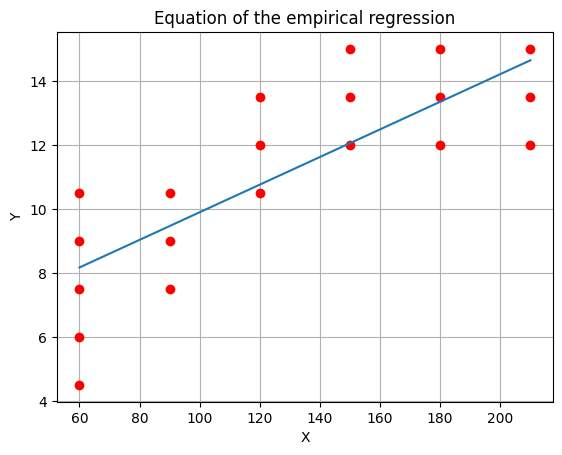

In [ ]:
import matplotlib.pyplot as plt
X = []
Y = []

for i in range(1, len(df.columns.values.tolist())-1):
  for j in range(len(df)-1):
    if(df[upper_line[i-1]][j] == '-'):
      continue
    else:
      Y.append(float(upper_line[i-1]))
      X.append(float(df["X\Y"][j]))
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Equation of the empirical regression")
plt.grid(True)
plt.plot(X, Y, "ro")
X = np.linspace(min(X), max(X), int((max(X)-min(X))/0.1))
Y2 = [f(ii) for ii in X]
plt.plot(X, Y2)